In [19]:
#Importing Libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder


In [20]:
#Importing Dataset
data = pd.read_csv("Online retail.csv",header = None)

In [21]:
# Cleaning the dataset
print("\nInitial shape:", data.shape)

# Remove missing rows
data = data.dropna()

# Remove duplicate transactions
data = data.drop_duplicates()

print("After cleaning:", data.shape)



Initial shape: (7501, 1)
After cleaning: (5176, 1)


In [22]:
#Creating a new Dataframe
transactions = data[0].apply(lambda x: [item.strip() for item in x.split(',') if item.strip() != ""]).tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary,columns=te.columns_)


In [23]:
frequent_itemsets = apriori(df_encoded,min_support=0.02,use_colnames=True)
rules = association_rules(frequent_itemsets,metric='lift',min_threshold=1)

#rules = rules.sorted_values(by='lift',ascending=False)

print("\nFrequent Itemsets : \n")
print(frequent_itemsets.head(),"\n")
print("\nAssociation Rules :\n")
print(rules[['antecedents','consequents','support','confidence','lift']].head())


Frequent Itemsets : 

    support     itemsets
0  0.029366    (almonds)
1  0.045981    (avocado)
2  0.020479  (black tea)
3  0.045015   (brownies)
4  0.113794    (burgers) 


Association Rules :

   antecedents     consequents   support  confidence      lift
0    (burgers)     (chocolate)  0.024536    0.215620  1.050892
1  (chocolate)       (burgers)  0.024536    0.119586  1.050892
2    (burgers)          (eggs)  0.036128    0.317487  1.525826
3       (eggs)       (burgers)  0.036128    0.173630  1.525826
4    (burgers)  (french fries)  0.029366    0.258065  1.339761


In [24]:
# Sort rules by highest lift
rules_sorted = rules.sort_values(by='lift', ascending=False)

print("\nTop 10 Rules with Highest Lift:\n")
print(rules_sorted[['antecedents','consequents','support','confidence','lift']].head(10))

# Filter strong rules (Support > 0.03, Confidence > 0.5, Lift > 1.2)
strong_rules = rules[
    (rules['support'] > 0.02) &
    (rules['confidence'] > 0.15) &
    (rules['lift'] > 1.3)
]

print("\nStrong Rules (Support > 0.02, Confidence > 0.15, Lift > 1.3):\n")
print(strong_rules[['antecedents','consequents','support','confidence','lift']])


print("\nAnalysis of Strong Association Rules:\n")

for _, rule in strong_rules.head(5).iterrows():
    antecedent = ', '.join(list(rule['antecedents']))
    consequent = ', '.join(list(rule['consequents']))
    print(f"Customers who purchase [{antecedent}] are likely to also purchase [{consequent}].")
    print(f"Support: {rule['support']:.2f}, Confidence: {rule['confidence']:.2f}, Lift: {rule['lift']:.2f}\n")




Top 10 Rules with Highest Lift:

                      antecedents                   consequents   support  \
123                 (ground beef)               (herb & pepper)  0.022798   
122               (herb & pepper)                 (ground beef)  0.022798   
205    (spaghetti, mineral water)                 (ground beef)  0.024730   
208                 (ground beef)    (spaghetti, mineral water)  0.024730   
114                    (tomatoes)           (frozen vegetables)  0.022604   
115           (frozen vegetables)                    (tomatoes)  0.022604   
110                      (shrimp)           (frozen vegetables)  0.023764   
111           (frozen vegetables)                      (shrimp)  0.023764   
207                   (spaghetti)  (ground beef, mineral water)  0.024730   
206  (ground beef, mineral water)                   (spaghetti)  0.024730   

     confidence      lift  
123    0.167852  2.525588  
122    0.343023  2.525588  
205    0.290909  2.141885  
208   

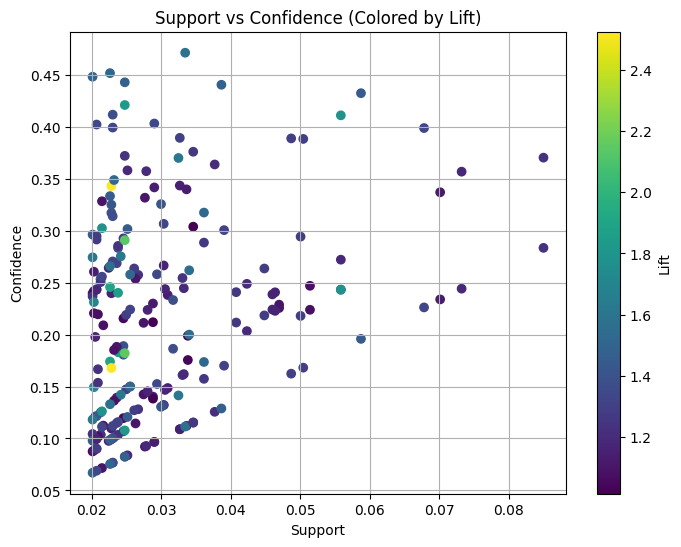

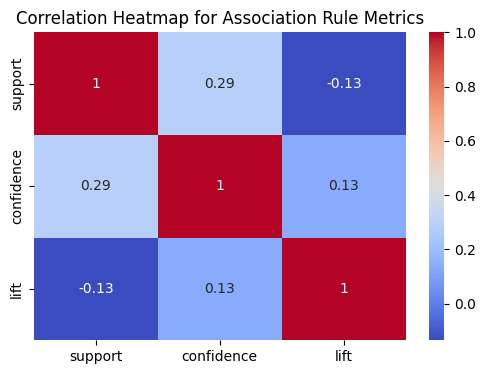

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Support vs Confidence (color = Lift)
plt.figure(figsize=(8,6))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence (Colored by Lift)')
plt.grid(True)
plt.show()


# Heatmap of correlation among support, confidence, lift
plt.figure(figsize=(6,4))
sns.heatmap(rules[['support','confidence','lift']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Association Rule Metrics')
plt.show()


In [26]:
print("\nKey Insights from Association Rule Mining:\n")
print("1. Certain products are frequently purchased together, showing complementary buying behavior.")
print("2. High-lift rules indicate strong, non-random associations between items.")
print("3. High-confidence rules can be used for cross-selling and recommendations.")
print("4. These insights can help in product bundling, promotions, and store layout optimization.")


Key Insights from Association Rule Mining:

1. Certain products are frequently purchased together, showing complementary buying behavior.
2. High-lift rules indicate strong, non-random associations between items.
3. High-confidence rules can be used for cross-selling and recommendations.
4. These insights can help in product bundling, promotions, and store layout optimization.


In [27]:
"""1. What is Lift and why is it important in Association Rules?

Lift measures how much more likely item A and B occur together compared to them occurring independently.

Formula: Lift = Support(A,B) / (Support(A) × Support(B)).

Lift > 1 → items appear together more than expected (positive association).

Lift = 1 → no real relationship between items.

Lift < 1 → items occur together less than expected (negative association).

Lift helps identify meaningful and strong relationships.

It removes misleading rules that occur due to popularity of items.

It shows the strength of a rule beyond random chance.

High lift rules are more useful for recommendations.

Lift is crucial in market basket analysis to find true associations.

2. What is Support and Confidence? How do you calculate them?

Support shows how frequently an item or itemset appears in the dataset.

Formula: Support(A) = (Transactions containing A) / (Total transactions).

Higher support means the rule is common and reliable.

Confidence measures how often rule B is true when A happens.

Formula: Confidence(A→B) = Support(A,B) / Support(A).

It represents the probability of buying B when A is bought.

Confidence shows the strength of implication.

Support ensures the rule has enough data backing.

Both are used to filter useful association rules.

Support + Confidence together validate rule frequency and trustworthiness.

3. Limitations or Challenges of Association Rule Mining

It may generate a very large number of rules, many of them useless.

Choosing good thresholds for support & confidence can be difficult.

Rules may be obvious or not interesting.

Does not consider item position or sequence—only co-occurrence.

High support may ignore rare but important patterns.

Low support creates too many rules (noise).

Confidence can be misleading—popular items always give high confidence.

Computation becomes slow for large datasets.

Lift helps but not all spurious rules are removed.

Interpretation of rules needs domain knowledge."""

'1. What is Lift and why is it important in Association Rules?\n\nLift measures how much more likely item A and B occur together compared to them occurring independently.\n\nFormula: Lift = Support(A,B) / (Support(A) × Support(B)).\n\nLift > 1 → items appear together more than expected (positive association).\n\nLift = 1 → no real relationship between items.\n\nLift < 1 → items occur together less than expected (negative association).\n\nLift helps identify meaningful and strong relationships.\n\nIt removes misleading rules that occur due to popularity of items.\n\nIt shows the strength of a rule beyond random chance.\n\nHigh lift rules are more useful for recommendations.\n\nLift is crucial in market basket analysis to find true associations.\n\n2. What is Support and Confidence? How do you calculate them?\n\nSupport shows how frequently an item or itemset appears in the dataset.\n\nFormula: Support(A) = (Transactions containing A) / (Total transactions).\n\nHigher support means the r